<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#02.-협업-필터링" data-toc-modified-id="02.-협업-필터링-1">02. 협업 필터링</a></span><ul class="toc-item"><li><span><a href="#1.-Neighborhood-based-method" data-toc-modified-id="1.-Neighborhood-based-method-1.1">1. Neighborhood based method</a></span><ul class="toc-item"><li><span><a href="#Neighborhood-based-method---KNN" data-toc-modified-id="Neighborhood-based-method---KNN-1.1.1">Neighborhood based method - KNN</a></span></li></ul></li><li><span><a href="#2.-Neighborhood-based-method---장단점" data-toc-modified-id="2.-Neighborhood-based-method---장단점-1.2">2. Neighborhood based method - 장단점</a></span></li><li><span><a href="#3.-KNN-실습" data-toc-modified-id="3.-KNN-실습-1.3">3. KNN 실습</a></span></li></ul></li></ul></div>

---

# 02. 협업 필터링
1. 정의 
    - 협업 필터링은 사용자의 구매 패턴이나 평점을 가지고 다른 사람들의 구매 패턴, 평점을 통해서 추천을 하는 방법이다. 추가적인 사용자의 개인 정보나 아이템의 정보가 없이도 추천할 수 있는게 큰 장점이며 2006년부터 2009년까지 열린 Netflix Prize Competition에서 우승한 알고리즘으로 유명세를 떨쳤다.<br><br>
    
2. 종류
    1. 최근접 이웃기반
    2. 잠재 요인기반

## 1. Neighborhood based method
1. 정의 
    - Neighborhood based Collaborative Filtering은 메모리 기반 알고리즘으로 협업 필터링을 위해 개발된 초기 알고리즘이다.<br><br>
    
2. 알고리즘
    1. User-based collaborative filtering
        - 사용자의 구매 패턴(평점)과 유사한 사용자를 찾아서 추천 리스트 생성<br>
    2. Item-based collaborative filtering
        - 특정 사용자가 준 점수간의 유사한 상품을 찾아서 추천 리스트 생성

### Neighborhood based method - KNN
1. K Nearest Neighbors<br>
가장 근접한 K명의 Neighbors를 통해서 예측하는 방법
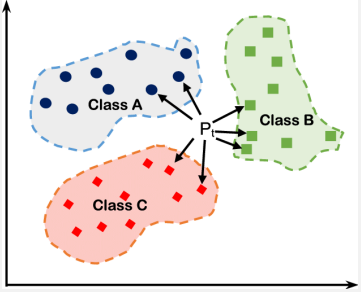

2. 데이터<br>
예를 들어, 아래와 같이 유저가 자신의 선호도를 직접 표현한 데이터가 있다고 할 때, 유저가 평점 등을 표현한 데이터를 Explicit Feedback된 데이터라고 한다.
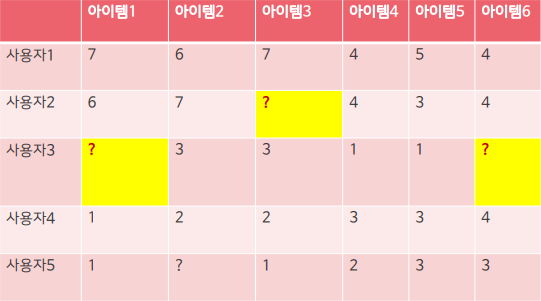

**3. User Based Collaborative Filtering**<br>
이제 이러한 사용자-아이템의 평점 행렬에서 비슷한 유저를 유사도 행렬을 통해서 찾는다. 보통은 코사인 유사도를 많이 사용하지만 피어슨 유사도도 많이 사용한다.
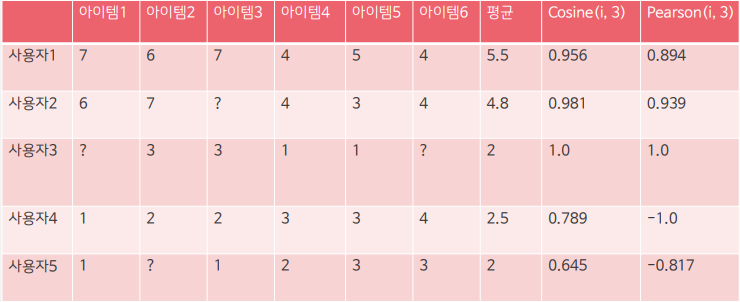

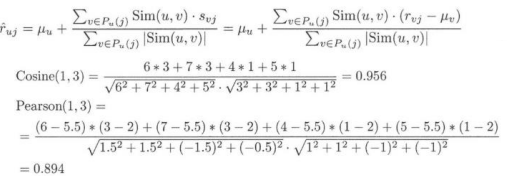

이렇게 해서 계산한 코사인 유사도와 피어슨 유사도는 위와 같다. 유사도를 통해서 사용자 1과 사용자 2가 유사하다는 것을 알 수 있다. 이를 이용하여 두 명의 사용자의 평점으로 사용자 3의 ?를 채우게 된다. 보통 계산은 평점 * 유사도값의 가중 평균을 통해서 계산한다.<br>
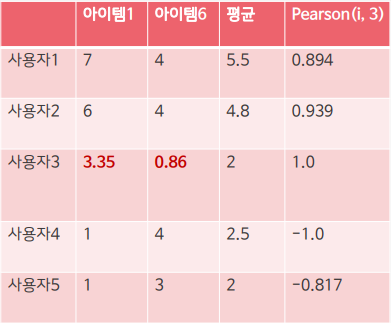

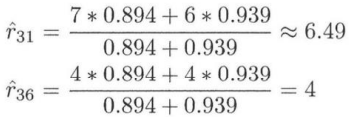

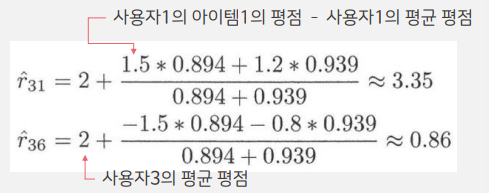

**4. Item Based Collaborative Filtering**
1. 데이터<br>
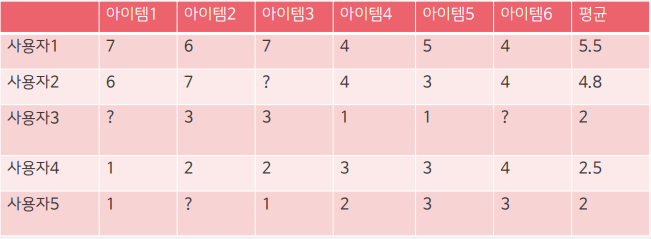<br>
여기서도 User Based Collaborative Filtering과 같이 편향을 제거해주는 과정이 필요하다. 이때에도 위와 동일하게 사용자의 평균 평점을 아이템의 평점에 빼줌으로서 계산하게 된다. 이후, 코사인 유사도를 계산하면 아이템간의 유사도를 계산할 수 있다.

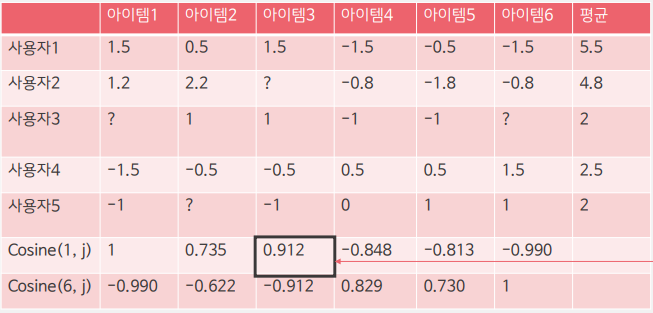<br>
이제 유사한 아이템을 찾아보도록 하자. 아이템 1의 경우 아이템 2와 3과 유사하다는 것을 알 수 있다. 그래서, 둘의 가중 평균을 통해서 사용자 3의 아이템 1과 아이템 6의 유사도를 계산할 수 있다.

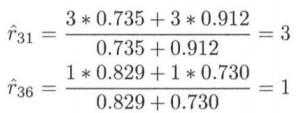

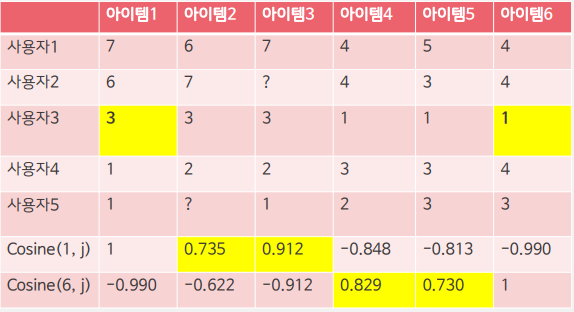

---

## 2. Neighborhood based method - 장단점
- 장점
    - 간단하고 직관적인 접근 방식 때문에 구현 및 디버그가 쉬움
    - 특정 Item을 추천하는 이유를 정당화하기 쉽고 Item 기반 방법의 해석 가능성이 두드러짐
    - 추천 리스트에 새로운 item과 user가 추가되어도 상대적으로 안정적
    
- 단점
    - User 기반 방법의 시간, 속도, 메모리가 많이 필요
    - 희소성 때문에 제한된 범위가 있음
        - John의 Top-K에만 관심이 있음
        - John과 비슷한 이웃 중에서 아무도 해리포터를 평가하지 않으면, John의 해리포터에 대한 등급 예측을 제공할 수가 없음.

---

## 3. KNN 실습

In [1]:
import surprise
import numpy as np
import pandas as pd
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset, SVD, SVDpp, NMF, KNNBaseline
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate

data = Dataset.load_builtin('ml-100k')
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])
df = df.astype(np.float32)

del df["id"]
df.head(10)

,user,item,rate
0,196.0,242.0,3.0
1,186.0,302.0,3.0
2,22.0,377.0,1.0
3,244.0,51.0,2.0
4,166.0,346.0,1.0
5,298.0,474.0,4.0
6,115.0,265.0,2.0
7,253.0,465.0,5.0
8,305.0,451.0,3.0
9,6.0,86.0,3.0


In [2]:
%%time 
reader = Reader(rating_scale=(1, 5))
knndata = Dataset.load_from_df(df[['user', 'item', 'rate']], reader)

sim_options = {'name': 'cosine'}
knn = surprise.KNNBasic(sim_options=sim_options, k=20)
score = cross_validate(knn, knndata, measures=['RMSE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0185  1.0235  1.0333  1.0243  1.0217  1.0243  0.0049  
Fit time          1.48    1.57    1.52    1.42    1.39    1.48    0.07    
Test time         2.48    2.95    2.72    2.62    2.69    2.69    0.15    
Wall time: 21.6 s


In [3]:
%%time 
user = 196

score_dict = {}
for sim in knn.get_neighbors(user, k=20):
    df_ = df[df['user'] == sim]
    for item, rate in zip(df_['item'].values, df_['rate'].values):
        if item not in df[df['user'] == user]['item'].values:
            try:
                score_dict[item] += rate
            except:
                score_dict[item] = rate

Wall time: 914 ms


In [6]:
# 상위 10개의 영화만 추천 
dict(sorted(score_dict.items(), key = lambda x: -x[1])[0:10]).keys()

dict_keys([50.0, 181.0, 258.0, 127.0, 174.0, 288.0, 172.0, 210.0, 423.0, 191.0])